In [ ]:
# !pip install ultralytics --upgrade
# !pip install pytesseract
# !apt update
# !apt install tesseract-ocr tesseract-ocr-spa -y
# !apt update
# !apt install tesseract-ocr -y
# !apt install tesseract-ocr-spa -y
# !pip install pdf2image
# python -m pip install --upgrade pip
# !pip install "numpy<2" --force-reinstall

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.



   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ----- ---------------------------------- 2.1/15.5 MB 9.8 MB/s eta 0:00:02
   ------ --------------------------------- 2.6/15.5 MB 7.6 MB/s eta 0:00:02
   -------- ------------------------------- 3.1/15.5 MB 4.7 MB/s eta 0:00:03
   -------------- ------------------------- 5.8/15.5 MB 6.5 MB/s eta 0:00:02
   -------------------- ------------------- 8.1/15.5 MB 7.4 MB/s eta 0:00:01
   -------------------------- ------------- 10.2/15.5 MB 8.0 MB/s eta 0:00:01
   --------------------------------- ------ 13.1/15.5 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------  15.5/15.5 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 15.5/15.5 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6


In [15]:
from pathlib import Path
import csv
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
from pathlib import Path
import pytesseract
import unicodedata
import cv2
import numpy as np
import json


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\JoseLeal\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\JoseLeal\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\JoseLeal\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    s

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [ ]:
# Entrada solicitada (imagen)
INPUT_PATH = Path('./facturaPrueba.jpg')

# Carpeta de resultados local
OUTPUT_DIR = Path('./resultados')
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print('Entrada:', INPUT_PATH.resolve())
print('Salida:', OUTPUT_DIR.resolve())


Entrada: C:\Users\JoseLeal\Desktop\API\facturaPrueba.jpg
Salida: C:\Users\JoseLeal\Desktop\API\resultados


In [ ]:

def resolve_input_image(input_path: Path) -> Path:
    suffix = input_path.suffix.lower()
    if suffix in {'.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp'}:
        return input_path
    raise ValueError(f"Formato no soportado: {suffix}. Usa una imagen (.png/.jpg/.jpeg/.bmp/.tiff/.webp)")


In [ ]:
# Sobrescribir/ajustar la función procesar_y_guardar_factura para modo local
# Si ya existe en el notebook, ajusta rutas y guardado local. Aquí envolvemos la llamada existente.
from datetime import datetime

if not INPUT_PATH.exists():
    raise FileNotFoundError(f'No se encontró el archivo de entrada: {INPUT_PATH}')

# Validar que la entrada es una imagen soportada
EFFECTIVE_INPUT = resolve_input_image(INPUT_PATH)
print('Usando entrada para inferencia:', EFFECTIVE_INPUT)

# Ejecutar la función principal existente del notebook
try:
    resultado = procesar_y_guardar_factura(str(EFFECTIVE_INPUT))
except NameError:
    # Si la función en el notebook se llama diferente, intenta alternativas
    try:
        resultado = procesar_factura(str(EFFECTIVE_INPUT))
    except NameError:
        raise NameError('No se encontró una función de procesamiento (e.g., procesar_y_guardar_factura o procesar_factura). Ajusta este celda a tu función principal.')

# Guardar resultado en carpeta local con timestamp
stamp = datetime.now().strftime('%Y%m%d_%H%M%S')
json_path = OUTPUT_DIR / f'resultado_factura_{stamp}.json'
import json
with open(json_path, 'w', encoding='utf-8') as f:
    json.dump(resultado, f, ensure_ascii=False, indent=2)
print('Resultado guardado en:', json_path.resolve())


Usando entrada para inferencia: facturaPrueba.jpg


NameError: No se encontró una función de procesamiento (e.g., procesar_y_guardar_factura o procesar_factura). Ajusta este celda a tu función principal.

In [ ]:
# Ruta donde guardar los resultados en la carpeta local 'facturas_procesadas'
output_dir = Path("facturas_procesadas")
output_dir.mkdir(parents=True, exist_ok=True)


image 1/1 /content/drive/MyDrive/TFM UCM/3. Código/3.2 Redes/facturas/7. Facturas test/factura04.jpg: 1280x928 1 Nombre del cliente, 1 Primer apellido del cliente, 1 Segundo apellido del cliente, 1 Dirección del cliente, 1 Numero de dirección del cliente, 1 Codigo postal, 1 Municipio, 1 Ciudad, 1 Telefono, 1 Email, 1 Num factura, 1 Fecha factura, 4 Descripcións, 3 Unidadess, 3 Precios, 3 Total lineas, 1 Total bruto, 3 Descuentos, 1 Portes, 1 Base imponible, 1 % IVA, 1 Importe IVA, 1 Total factura, 1 Forma de pago, 3 Codigo articulos, 64.8ms
Speed: 8.5ms preprocess, 64.8ms inference, 1.6ms postprocess per image at shape (1, 3, 1280, 928)

image 1/1 /content/drive/MyDrive/TFM UCM/3. Código/3.2 Redes/facturas/7. Facturas test/factura04.jpg: 1280x928 1 Albarán, 1 Forma de pago, 62.3ms
Speed: 8.7ms preprocess, 62.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1280, 928)

📄 factura04.jpg – Clases detectadas:
 - segundo apellido del cliente: 0.87 -> ROMERO
 - codigo postal: 0.84 

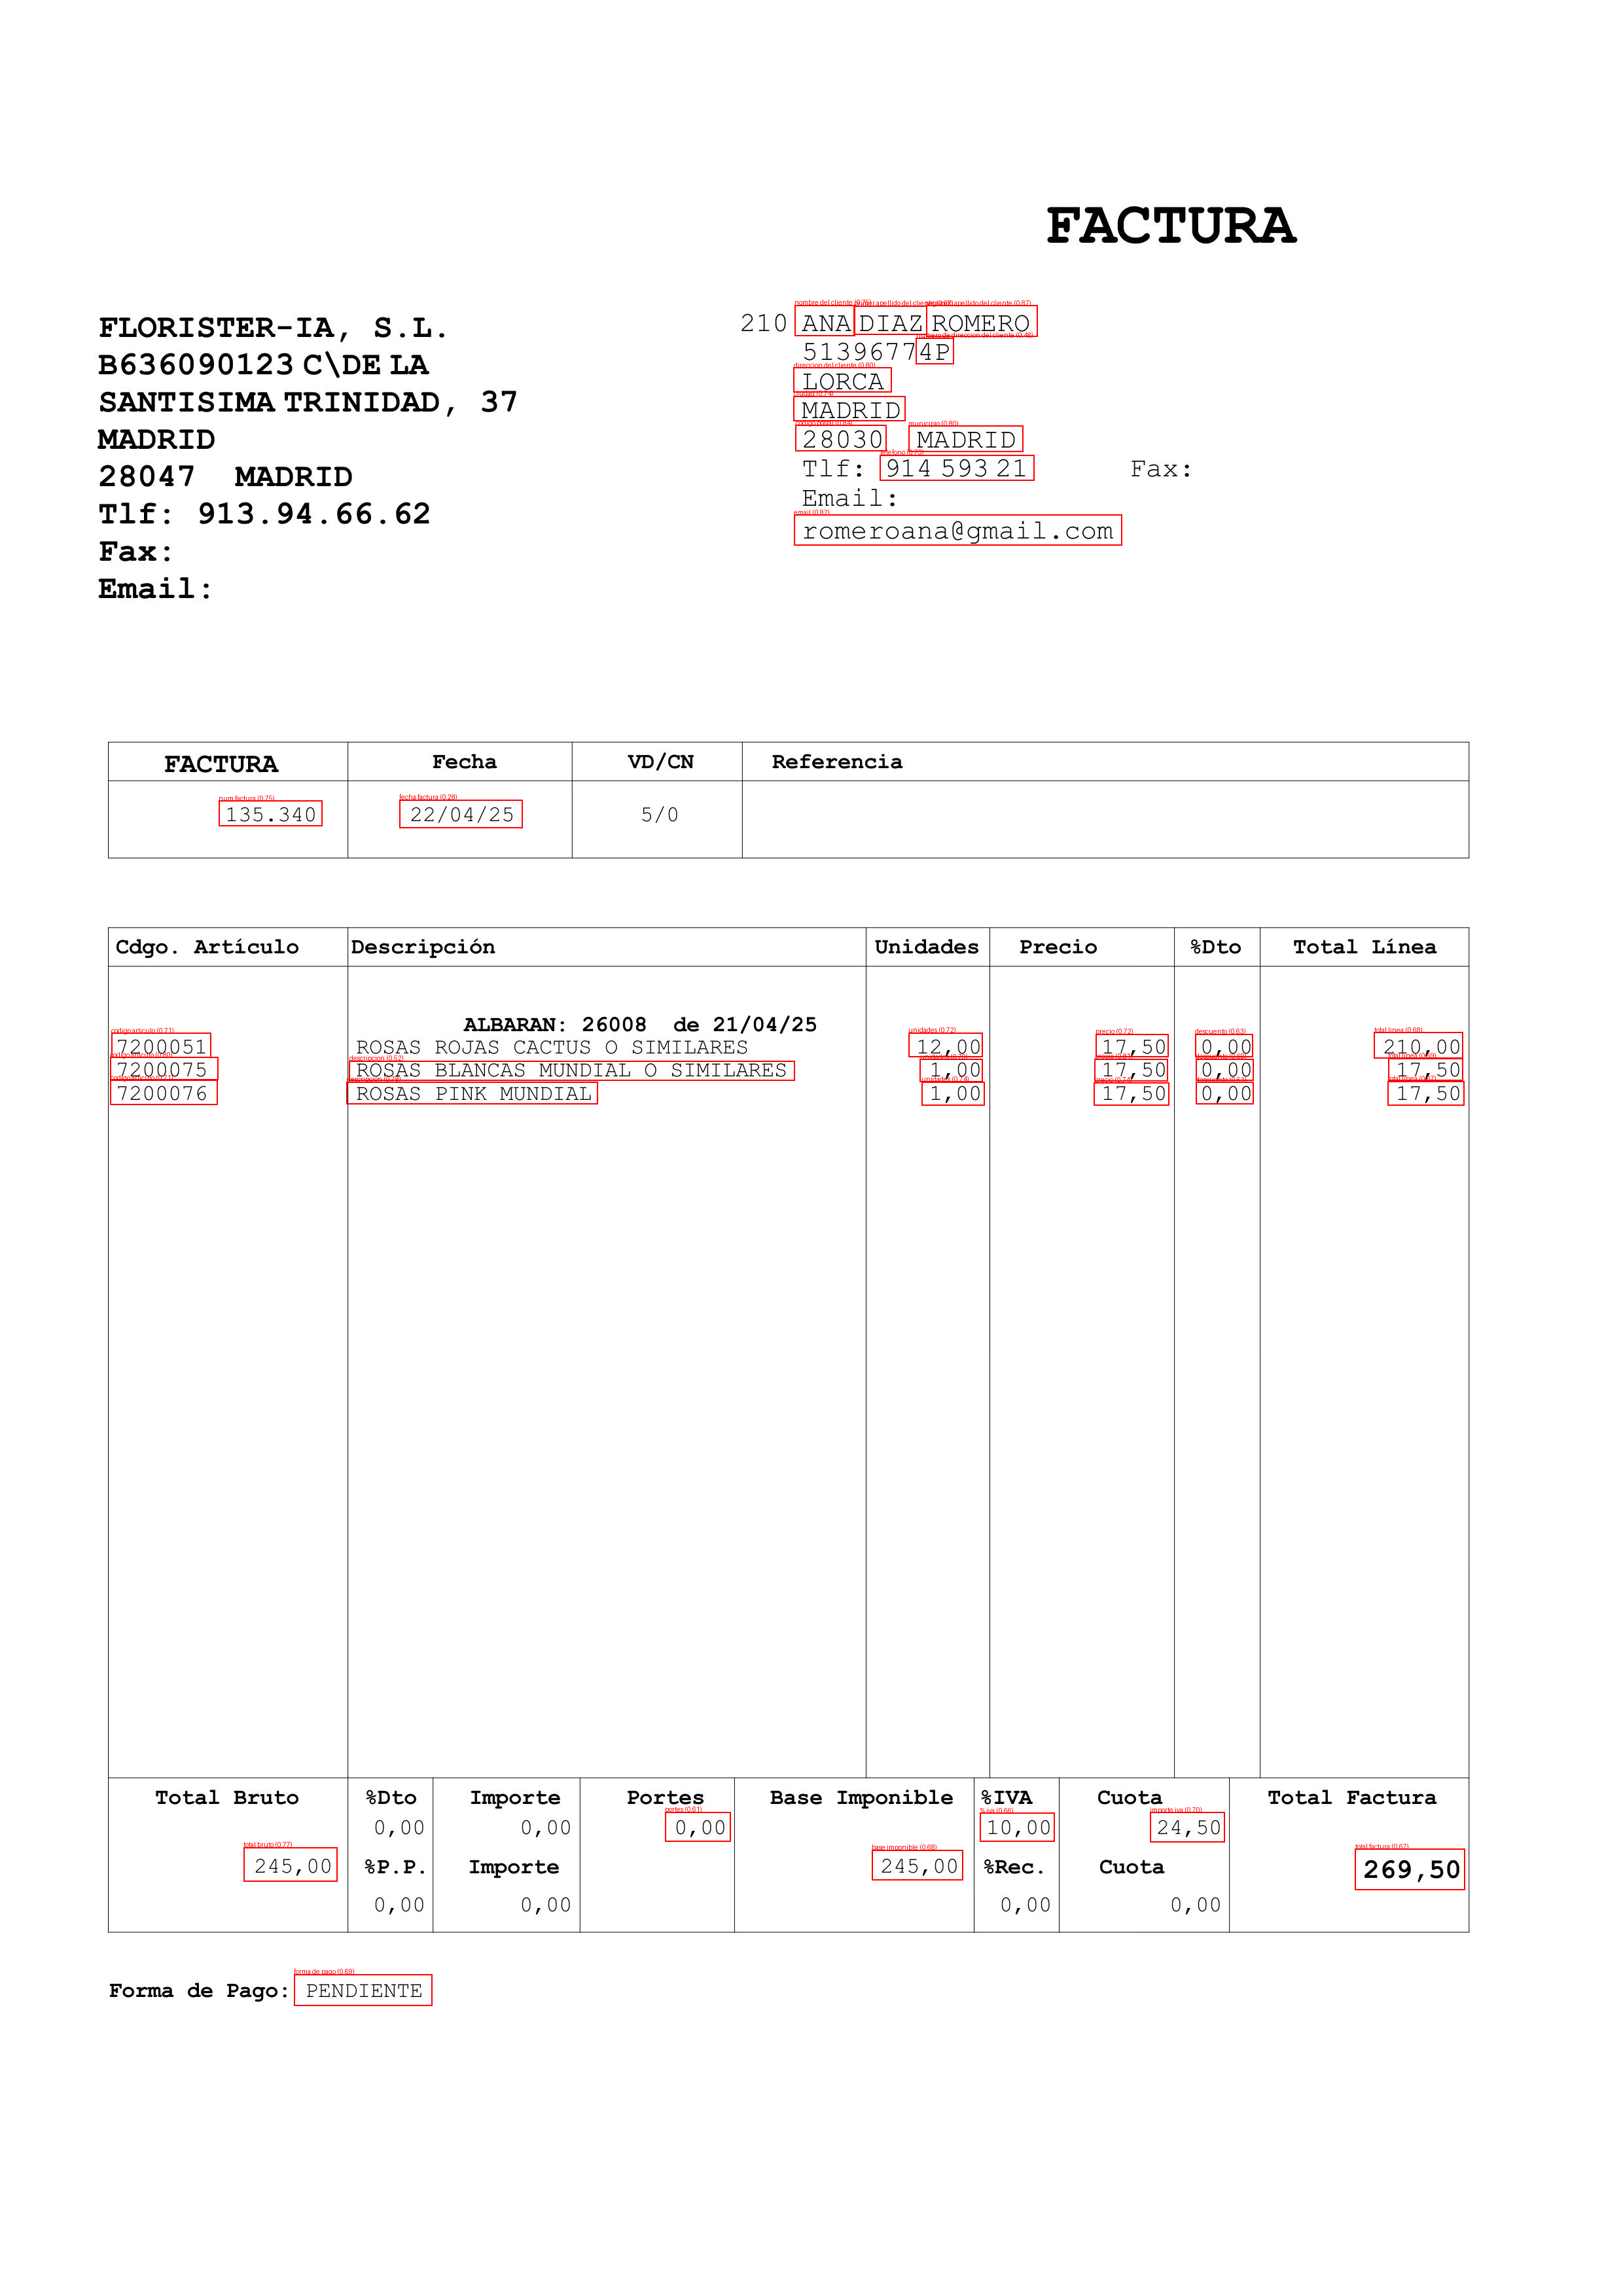


✅ Imagen guardada en: /content/drive/MyDrive/TFM UCM/3. Código/3.2 Redes/facturas/7. Facturas test/Resultados test/factura04_pred.jpg
✅ JSON guardado en: /content/drive/MyDrive/TFM UCM/3. Código/3.2 Redes/facturas/7. Facturas test/Resultados test/factura04_pred.json
✅ CSV guardado en: /content/drive/MyDrive/TFM UCM/3. Código/3.2 Redes/facturas/7. Facturas test/Resultados test/factura04_pred.csv


In [ ]:
# ✅ Normalizar nombres de clase
def normalizar(texto):
    return unicodedata.normalize('NFKD', texto.lower()).encode('ascii', 'ignore').decode('utf-8').strip()

# ✅ Cargar modelos (local)
modelo_general_normal = YOLO("./models/best_general.pt")
modelo_especifico_extra = YOLO("./models/best_extra.pt")

# ✅ Clases especializadas
clases_especiales = {normalizar(c) for c in ["albarán", "total bruto", "base imponible", "forma de pago"]}

# ✅ Umbrales por clase
umbral_clase = {
    "albaran": 0.40, "total bruto": 0.35, "base imponible": 0.35, "forma de pago": 0.40,
    "descuento": 0.25, "fecha factura": 0.25, "codigo articulo": 0.25, "Descripción": 0.20
}
umbral_default = 0.30

# ✅ Clases esperadas
clases_esperadas_raw = {
    "Nombre del cliente", "Primer apellido del cliente", "Segundo apellido del cliente", "Dirección del cliente",
    "Numero de dirección del cliente", "Codigo postal", "Municipio", "Ciudad", "Telefono", "Email",
    "Num factura", "Fecha factura", "Referencia", "Albarán", "Descripción", "Unidades", "Precio",
    "Total linea", "Total bruto", "Descuento", "Portes", "Base imponible", "% IVA", "Importe IVA",
    "Total factura", "Forma de pago", "Codigo articulo"
}
clases_esperadas = {normalizar(c) for c in clases_esperadas_raw}

# ✅ Combinar predicciones
def combinar_predicciones(pred_g, pred_s):
    predicciones = []
    # Modelo general
    boxes_g = pred_g[0].boxes
    nombres_g = [normalizar(modelo_general_normal.names[int(c)]) for c in boxes_g.cls]
    for i, nombre in enumerate(nombres_g):
        conf = float(boxes_g[i].conf[0])
        umbral = umbral_clase.get(nombre, umbral_default)
        if conf >= umbral:
            predicciones.append((nombre, boxes_g[i]))
    # Modelo especializado
    boxes_s = pred_s[0].boxes
    nombres_s = [normalizar(modelo_especifico_extra.names[int(c)]) for c in boxes_s.cls]
    for i, nombre in enumerate(nombres_s):
        if nombre not in clases_especiales:
            continue
        conf = float(boxes_s[i].conf[0])
        umbral = umbral_clase.get(nombre, umbral_default) + 0.10
        if conf >= umbral:
            predicciones.append((nombre, boxes_s[i]))
    return predicciones

# ✅ Eliminar duplicados de clases únicas
def filtrar_duplicados_por_clase(predicciones, clases_multivalor):
    from collections import defaultdict
    agrupadas = defaultdict(list)
    for nombre, box in predicciones:
        agrupadas[nombre].append((nombre, box))
    resultado = []
    for clase, elementos in agrupadas.items():
        if clase in clases_multivalor:
            resultado.extend(elementos)
        else:
            mejor = max(elementos, key=lambda x: float(x[1].conf[0]))
            resultado.append(mejor)
    return resultado

# ✅ OCR por caja (mejorado con margen y escala de grises)

def extraer_texto_por_cajas(imagen_path, predicciones, margen=5):
    imagen_pil = Image.open(imagen_path).convert("RGB")
    imagen_cv = np.array(imagen_pil)
    imagen_cv = cv2.cvtColor(imagen_cv, cv2.COLOR_RGB2BGR)
    alto, ancho = imagen_cv.shape[:2]

    resultados = {}

    for nombre, box in predicciones:
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())

        # Añadir margen
        x1 = max(0, x1 - margen)
        y1 = max(0, y1 - margen)
        x2 = min(ancho, x2 + margen)
        y2 = min(alto, y2 + margen)

        region = imagen_cv[y1:y2, x1:x2]
        # Binarizar para más contraste
        region_gray = cv2.cvtColor(region, cv2.COLOR_BGR2GRAY)
        region_thresh = cv2.adaptiveThreshold(
            region_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 10
        )

        # Convertir de nuevo a PIL para OCR
        region_pil = Image.fromarray(region_thresh)
        texto = pytesseract.image_to_string(region_pil, lang="spa").strip()

        # Limpiar saltos de línea y caracteres raros
        texto = "\n".join([line for line in texto.splitlines() if line.strip() != ""])
        texto = texto.replace("ﬁ", "fi").replace("ﬂ", "fl")

        if nombre not in resultados:
            resultados[nombre] = []
        resultados[nombre].append(texto)

    return resultados


# ✅ Visualización de predicciones
def visualizar_predicciones(imagen_path, predicciones):
    image = Image.open(imagen_path).convert("RGB")
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()
    for nombre, box in predicciones:
        conf = float(box.conf[0])
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        draw.rectangle([x1, y1, x2, y2], outline="red", width=2)
        draw.text((x1, y1 - 10), f"{nombre} ({conf:.2f})", fill="red", font=font)
    return image

# ✅ Procesar factura
def procesar_y_guardar_factura(ruta_imagen):
    imagen_path = Path(ruta_imagen)
    if not imagen_path.exists():
        raise FileNotFoundError(f"❌ Imagen no encontrada: {imagen_path}")

    pred_g = modelo_general_normal.predict(str(imagen_path), conf=0.25)
    pred_s = modelo_especifico_extra.predict(str(imagen_path), conf=0.25)
    predicciones = combinar_predicciones(pred_g, pred_s)

    clases_multivalor = {
        "codigo articulo", "descripcion", "unidades", "precio", "descuento", "total linea"
    }
    predicciones = filtrar_duplicados_por_clase(predicciones, clases_multivalor)

    texto_extraido = extraer_texto_por_cajas(imagen_path, predicciones)

    agrupadas = {}
    for nombre, box in predicciones:
        x1, y1, x2, y2 = map(float, box.xyxy[0])
        conf = float(box.conf[0])
        texto = texto_extraido.get(nombre, [""])[0] if nombre in texto_extraido else ""
        texto = texto.strip()

        # 📨 Corrección del campo email
        if nombre == "email":
            texto = texto.replace("fgmail.com", "@gmail.com").replace(" ", "")
            if "@" not in texto and "gmail" in texto:
                texto = texto.replace("gmail", "@gmail")
            if not texto.endswith(".com") and ".com" in texto:
                texto = texto.split(".com")[0] + ".com"

        # 📥 Fallback para campos vacíos SOLO si no se detectó la clase
        if not texto:
            if nombre in {"unidades", "importe iva", "portes"}:
                texto = "0,00"
            elif nombre == "numero de direccion del cliente" and nombre not in texto_extraido:
                texto = "N/D"

        if nombre not in agrupadas:
            agrupadas[nombre] = []
        agrupadas[nombre].append({
            "confianza": conf,
            "bbox": [x1, y1, x2, y2],
            "texto": texto
        })


    print(f"\n📄 {imagen_path.name} – Clases detectadas:")
    for nombre, instancias in agrupadas.items():
        for inst in instancias:
            print(f" - {nombre}: {inst['confianza']:.2f} -> {inst['texto']}")

    clases_detectadas = set(agrupadas.keys())
    clases_faltantes = clases_esperadas - clases_detectadas
    if clases_faltantes:
        print("\n⚠️ Campos NO detectados:")
        for clase in sorted(clases_faltantes):
            print(f" - {clase}")

    datos_factura = {}
    for campo in clases_esperadas:
        datos_factura[campo] = agrupadas.get(campo, None)

    resultado_img = visualizar_predicciones(imagen_path, predicciones)
    display(resultado_img)

    # Guardar en carpeta local OUTPUT_DIR definida arriba
    output_dir = OUTPUT_DIR
    output_dir.mkdir(parents=True, exist_ok=True)

    nombre_img = output_dir / f"{imagen_path.stem}_pred.jpg"
    nombre_json = output_dir / f"{imagen_path.stem}_pred.json"
    nombre_csv = output_dir / f"{imagen_path.stem}_pred.csv"

    resultado_img.save(nombre_img)
    with open(nombre_json, "w", encoding="utf-8") as f:
        json.dump(datos_factura, f, indent=4, ensure_ascii=False)

    with open(nombre_csv, mode='w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(["campo", "texto", "confianza", "x1", "y1", "x2", "y2"])
        for campo, instancias in agrupadas.items():
            for inst in instancias:
                texto = inst["texto"]
                conf = round(inst["confianza"], 4)
                x1, y1, x2, y2 = inst["bbox"]
                writer.writerow([campo, texto, conf, x1, y1, x2, y2])

    print(f"\n✅ Imagen guardada en: {nombre_img}")
    print(f"✅ JSON guardado en: {nombre_json}")
    print(f"✅ CSV guardado en: {nombre_csv}")

# ✅ Ejecutar (local)
# Valida y procesa la imagen directamente
img_path = resolve_input_image(INPUT_PATH)
procesar_y_guardar_factura(str(img_path))